In [1]:
# -*- coding: utf-8 -*-

In [2]:
from __future__ import unicode_literals

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
%matplotlib inline

In [9]:
import sys
import os

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import pandas as pd

from .. import gen_graphs as gg
%aimport ../classifier
%aimport ../graph_methods
%aimport ../ecdf

ValueError: Attempted relative import in non-package

In [6]:
rcParams.update({'figure.autolayout': True})

In [7]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# matplotlib.rc('font', family='Arial')
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [8]:
python_file = 'recast.py'
# trace = '../traces/USC/usc-parsed.trace'
# trace = '../traces/USC/usc_filter.txt'
# trace = '../traces/dartmouth/dartmouth-parsed.trace'
# trace = '../traces/wdm/wdm-default-filter.txt'
trace = '../traces/slaw/slaw_a35_v06-filter.txt'
timestep = '86400'
sys.argv = [python_file, trace, timestep]
path = os.path.split(trace)[0]
trace_name = os.path.split(trace)[1].split('.')[0]

In [9]:
recast.main()

-- reading input file ../traces/slaw/slaw_a35_v06-filter.txt -- 


# Clustering coefficient

###### Slow, depending on the size of the graph

In [11]:
def clustering(graphs):
    l = []
    for k, graph in graphs.iteritems():
        if len(graph) == 0:
            l.append(0)
            continue
        print "calculating average clustering for graph {} with #nodes = {} and #edges = {}".format(k, len(graph.nodes()), len(graph.edges()))
        l.append(nx.average_clustering(graph, count_zeros=True))
        
    return l

In [12]:
cc_x = range(1, 30)

In [13]:
# send the temporal accumulator graph
# cc_y_t = clustering(recast.temporal_accumulator_graphs)
cc_y_t = clustering(recast.temporal_graphs)

calculating average clustering for graph 0 with #nodes = 98 and #edges = 285
calculating average clustering for graph 1 with #nodes = 98 and #edges = 275
calculating average clustering for graph 2 with #nodes = 100 and #edges = 287
calculating average clustering for graph 3 with #nodes = 99 and #edges = 278
calculating average clustering for graph 4 with #nodes = 97 and #edges = 277
calculating average clustering for graph 5 with #nodes = 99 and #edges = 282
calculating average clustering for graph 6 with #nodes = 100 and #edges = 273
calculating average clustering for graph 7 with #nodes = 99 and #edges = 289
calculating average clustering for graph 8 with #nodes = 100 and #edges = 286
calculating average clustering for graph 9 with #nodes = 100 and #edges = 278
calculating average clustering for graph 10 with #nodes = 97 and #edges = 274
calculating average clustering for graph 11 with #nodes = 99 and #edges = 299
calculating average clustering for graph 12 with #nodes = 100 and #edg

In [14]:
# send the random temporal accumulator graph
# cc_y_r = clustering(recast.random_temporal_accumulator_graphs)
cc_y_r = clustering(recast.random_graphs)

calculating average clustering for graph 0 with #nodes = 98 and #edges = 288
calculating average clustering for graph 1 with #nodes = 98 and #edges = 290
calculating average clustering for graph 2 with #nodes = 100 and #edges = 278
calculating average clustering for graph 3 with #nodes = 99 and #edges = 272
calculating average clustering for graph 4 with #nodes = 97 and #edges = 273
calculating average clustering for graph 5 with #nodes = 99 and #edges = 289
calculating average clustering for graph 6 with #nodes = 100 and #edges = 307
calculating average clustering for graph 7 with #nodes = 99 and #edges = 287
calculating average clustering for graph 8 with #nodes = 100 and #edges = 276
calculating average clustering for graph 9 with #nodes = 100 and #edges = 244
calculating average clustering for graph 10 with #nodes = 97 and #edges = 265
calculating average clustering for graph 11 with #nodes = 99 and #edges = 279
calculating average clustering for graph 12 with #nodes = 100 and #edg

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


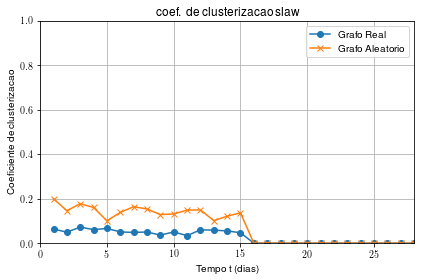

In [15]:
plt.plot(cc_x, cc_y_t, marker='o', label='Grafo Real')
plt.plot(cc_x, cc_y_r, marker='x', label='Grafo Aleatorio')
plt.title('coef. de clusterizacao ' + trace_name.split('_')[0])
plt.ylim(0, 1)
plt.xlim(0, 28)
plt.ylabel("Coeficiente de clusterizacao")
plt.xlabel("Tempo t (dias)")
plt.legend()
plt.grid()

# Edge persistence

In [16]:
ep = classifier.get_ep(recast.temporal_graphs)
flatten_ep = np.array(ep.values()).flatten()

In [17]:
random_ep = classifier.get_ep(recast.random_graphs)
flatten_random_ep = np.array(random_ep.values()).flatten()

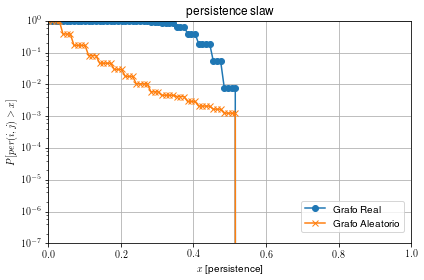

In [18]:
x = np.linspace(0.0, 1.0, 100)
y = ecdf.calc_ecdf(flatten_ep)
y_r = ecdf.calc_ecdf(flatten_random_ep)

# yrange = [0, 10**(-6), 10**(-3), 10**(0)]
# ylabels = ['10^-6', '10^-3', '10^-0']

plt.plot(x, y, marker='o', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log', basey=10)
plt.xlim(0, 1)
plt.ylim ([10**(-7), 10**(0)])

plt.title("persistence " + trace_name.split('_')[0])

plt.ylabel('$P[per(i, j) > x]$')
plt.xlabel('$x$ [persistence]')

plt.legend(bbox_to_anchor=(0.98,0.05), loc=4, borderaxespad=0.)
# plt.legend()
plt.grid()
plt.show()



In [19]:
classifier.get_x(random_ep, 0.001)

0.51724137931034486

# topological overlap

In [20]:
to = classifier.get_to(recast.aggregated_graph)
flatten_to = np.array(to.values()).flatten()

In [21]:
random_to = classifier.get_to(recast.random_aggregated_graph)
flatten_random_to = np.array(random_to.values()).flatten()

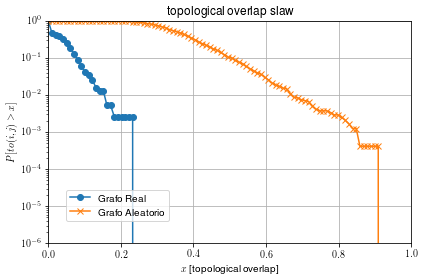

In [22]:
x = np.linspace(0.0, 1.0, 100)
y = ecdf.calc_ecdf(flatten_to)
y_r = ecdf.calc_ecdf(flatten_random_to)

# yrange = [0, 10**(-6), 10**(-3), 10**(0)]
# ylabels = ['10^-6', '10^-3', '10^-0']

plt.plot(x, y, marker='o', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log', basey=10)
plt.xlim(0, 1)
# plt.ylim ([10**(-8), 10**(0)])
plt.ylim ([10**(-6), 10**(0)])

plt.title("topological overlap " + trace_name.split('_')[0])

plt.ylabel(r'$P[to(i, j) > x]$')
plt.xlabel("$x$ [topological overlap]")

plt.legend(bbox_to_anchor=(0.05, 0.1), loc='lower left', borderaxespad=0.)
# plt.legend()
plt.grid()
plt.show()



In [23]:
classifier.get_x(random_to, 1e-3)

0.85363962202671884

# tempo

In [ ]:
delta = classifier.get_delta(recast.temporal_graphs)
flatten_delta = np.array(delta.values()).flatten()

In [ ]:
classifier.set_delta (recast.random_graphs, recast.temporal_graphs)

In [ ]:
random_delta = classifier.get_delta(recast.random_graphs)
flatten_random_delta = np.array(random_delta.values()).flatten()

### teste

In [ ]:
# tgraph = {
#     0: nx.Graph([ (0, 1, {'delta': 10}), (1, 2, {'delta': 1}) ]),
#     1: nx.Graph([ (0, 1, {'delta': 9}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
#     2: nx.Graph([ (0, 1, {'delta': 12}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
# }

# rgraph = {
#     0: nx.Graph([ (0, 1, {'delta': 1}), (1, 2, {'delta': 9}) ]),
#     1: nx.Graph([ (0, 1, {'delta': 12}), (1, 2, {'delta': 1}), (0, 2, {'delta': 1}) ]),
#     2: nx.Graph([ (0, 1, {'delta': 1}), (1, 2, {'delta': 1}), (0, 2, {'delta': 12}) ]),
# }

# delta = classifier.get_delta(tgraph)
# flatten_delta = np.array(delta.values()).flatten()
# random_delta = classifier.get_delta(rgraph)
# flatten_random_delta = np.array(random_delta.values()).flatten()

In [ ]:
x = np.linspace(
    0,
    np.max(np.append (flatten_delta, flatten_random_delta)),
    100
)

y = ecdf.calc_ecdf(flatten_delta, linspace=x)
y_r = ecdf.calc_ecdf(flatten_random_delta, linspace=x)

plt.plot(x, y, marker='|', label='Grafo Real')
plt.plot(x, y_r, marker='x', label='Grafo Aleatorio')

plt.yscale('log')
plt.xscale('log')

# plt.xlim(0, 1e2)
# plt.ylim ([0.8, 1])


plt.title("Tempo " + trace_name.split('_')[0])

plt.ylabel(r'$P[time(i, j) > x]$')
plt.xlabel("$x$ [time]")

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)
plt.grid()

plt.show()



In [ ]:
aux = 0
pr = 1e0
x = classifier.get_x(random_delta, pr)
for i in delta.itervalues():
    if i > 86400*3:
        aux += 1

print aux

In [ ]:
classifier.get_x(random_delta, 1e-6)

In [ ]:
aux = 0
pr = 1e0
x = classifier.get_x(random_delta, pr)
for i in delta.itervalues():
    if i > x:
        aux += 1

print (aux*100.0)/len(delta)

# Save results

In [24]:
p_rnd = [1e-6, 1e-5, 1e-4, 1e-3,]

In [34]:
def save_edges(fname='', ext=''):
    
    for p in p_rnd:

        x_ep = classifier.get_x (random_ep, p)
        x_to = classifier.get_x (random_to, p)

        relations = dict()

        f = open(fname + str(p) + ext, 'w')
        print ('saving {}'.format(fname + str(p) + ext))

        for edge in recast.aggregated_graph.edges_iter():#ep.iterkeys():
            x = edge[0]
            y = edge[1]
            f.write(str(x) + ' ' + str(y) + ' ')
            if (ep[edge] > x_ep and to[edge] > x_to):
                f.write(str(classifier.friends) + '\n')
            elif (ep[edge] <= x_ep and to[edge] > x_to):
                f.write(str(classifier.acquaintance) + '\n')
            elif (ep[edge] > x_ep and to[edge] <= x_to):
                f.write(str(classifier.bridges) + '\n')
            else:
                f.write(str(classifier.random) + '\n')
                
            f.write(str(y) + ' ' + str(x) + ' ')
            if (ep[edge] > x_ep and to[edge] > x_to):
                f.write(str(classifier.friends) + '\n')
            elif (ep[edge] <= x_ep and to[edge] > x_to):
                f.write(str(classifier.acquaintance) + '\n')
            elif (ep[edge] > x_ep and to[edge] <= x_to):
                f.write(str(classifier.bridges) + '\n')
            else:
                f.write(str(classifier.random) + '\n')

        f.close()

In [36]:
save_edges(fname='recast_class' + os.sep + 'slaw_a35/', ext='.txt')

saving recast_class/slaw_a35/1e-06.txt
saving recast_class/slaw_a35/1e-05.txt
saving recast_class/slaw_a35/0.0001.txt
saving recast_class/slaw_a35/0.001.txt


# Classify results

In [75]:
p_rnd = [10**(-6), 10**(-5), 10**(-4), 10**(-3)]

In [76]:
def classify (ep, random_ep, to, random_to, p_rnd):
    # print 'classifying edge persistence'
    # rep = classify_ep (ep, random_ep, p_rnd)

    # print 'classifying topological overlap'
    # rto = classify_to (to, random_to, p_rnd)
    
    # print 'combining edge persistence and topological overlap'
    # relations = classify_relationships (rep, rto)
    # return relations

    x_ep = classifier.get_x (random_ep, p_rnd)
    x_to = classifier.get_x (random_to, p_rnd)
    
    print x_ep, x_to
    
    x_to -= 0.15

    relations = dict()

    for edge in recast.aggregated_graph.edges_iter():#ep.iterkeys():
        if (ep[edge] > x_ep and to[edge] > x_to):
            relations[edge] = classifier.friends
        elif (ep[edge] <= x_ep and to[edge] > x_to):
            relations[edge] = classifier.acquaintance
        elif (ep[edge] > x_ep and to[edge] <= x_to):
            relations[edge] = classifier.bridges
        else:
            relations[edge] = classifier.random

    return relations

In [77]:
results = []
for p in p_rnd:
#     results.append(classifier.classify(ep, random_ep, to, random_to, p))
    print 'classify for p_rnd', p
    results.append(classify(ep, random_ep, to, random_to, p))
    print


classify for p_rnd 1e-06
0.51724137931 0.98

classify for p_rnd 1e-05
0.51724137931 0.98

classify for p_rnd 0.0001
0.51724137931 0.98

classify for p_rnd 0.001
0.51724137931 0.98



In [78]:
friends = []
random = []
bridges = []
acquaintance = []
for i in results:
    r = classifier.combine_relations(i)
    random.append(r[0])
    friends.append(r[2])
    acquaintance.append(r[3])
    bridges.append(r[4])

In [79]:
friends

[0, 0, 0, 0]

In [80]:
random

[0, 0, 0, 0]

In [81]:
bridges

[0, 0, 0, 0]

In [82]:
acquaintance

[4950, 4950, 4950, 4950]

In [35]:
map (sum, zip(friends, bridges, random, acquaintance))

[22645, 22645, 22645, 22645]

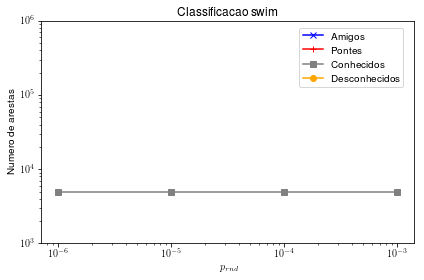

In [83]:
plt.plot(p_rnd, friends, marker='x', label='Amigos', color='blue')
plt.plot(p_rnd, bridges, marker='+', label='Pontes', color='red')
plt.plot(p_rnd, acquaintance, marker='s', label='Conhecidos', color='gray')
plt.plot(p_rnd, random, marker='o', label='Desconhecidos', color='orange')

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

plt.ylim ([1e3, 1e6])

# plt.yticks(yrange, ylabels)

plt.title(r'Classificacao ' + trace_name.split('_')[0])

plt.ylabel("Numero de arestas")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)

plt.show()



# Classify with time

In [ ]:
p_rnd = [1e-6, 1e-5, 1e-4, 1e-3,]

In [ ]:
def classify (ep, random_ep, to, random_to, delta, random_delta, p_rnd):
    # print 'classifying edge persistence'
    # rep = classify_ep (ep, random_ep, p_rnd)

    # print 'classifying topological overlap'
    # rto = classify_to (to, random_to, p_rnd)
    
    # print 'combining edge persistence and topological overlap'
    # relations = classify_relationships (rep, rto)
    # return relations
    
    def rev_edge (edge):
        if (edge not in delta):
            return (edge[1], edge[0])
        return edge

    x_ep = classifier.get_x (random_ep, p_rnd)
    x_to = classifier.get_x (random_to, p_rnd)
    x_time = classifier.get_x(random_delta, p_rnd)

    x_to -= 0.15
    
    print x_ep, x_to, x_time

    relations = dict()

    for edge in ep.iterkeys():
        if (ep[edge] > x_ep and to[edge] > x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'ppp'
        elif (ep[edge] > x_ep and to[edge] > x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'ppn'
        elif (ep[edge] > x_ep and to[edge] <= x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'pnp'
        elif (ep[edge] > x_ep and to[edge] <= x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'pnn'
        elif (ep[edge] <= x_ep and to[edge] > x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'npp'
        elif (ep[edge] <= x_ep and to[edge] > x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'npn'
        elif (ep[edge] <= x_ep and to[edge] <= x_to and delta[rev_edge(edge)] > x_time):
            relations[edge] = 'nnp'
        elif (ep[edge] <= x_ep and to[edge] <= x_to and delta[rev_edge(edge)] <= x_time):
            relations[edge] = 'nnn'

    return relations

In [ ]:
results = []
for i, p in enumerate(p_rnd):
#     results.append(classifier.classify(ep, random_ep, to, random_to, p))
    print 'classify for p_rnd', p
    results.append(classify(ep, random_ep, to, random_to, delta, random_delta, p))
    print


In [ ]:
ppp, ppn, pnp, pnn, npp, npn, nnp, nnn = [], [], [], [], [], [], [], []
for i in results:
    r = classifier.combine_relations_with_time(i)
    ppp.append(r['ppp'])
    ppn.append(r['ppn'])
    pnp.append(r['pnp'])
    pnn.append(r['pnn'])
    npp.append(r['npp'])
    npn.append(r['npn'])
    nnp.append(r['nnp'])
    nnn.append(r['nnn'])

In [ ]:
map (sum, zip(ppp, ppn, pnp, pnn, npp, npn, nnp, nnn))

In [ ]:
plt.plot(p_rnd, ppp, marker='x', label='Super Amigos', )
plt.plot(p_rnd, ppn, marker='+', label='Amigos', )
plt.plot(p_rnd, pnp, marker='s', label='Super Pontes', )
plt.plot(p_rnd, pnn, marker='o', label='Pontes', )
plt.plot(p_rnd, npp, marker='>', label='Super Conhecidos', )
plt.plot(p_rnd, npn, marker='v', label='Conhecidos', )
plt.plot(p_rnd, nnp, marker='*', label='Anomalia', )
plt.plot(p_rnd, nnn, marker='<', label='Desconhecidos', )

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

# plt.ylim ([1e3, 1e6])

# plt.yticks(yrange, ylabels)

plt.title('Classificacao ' + trace_name.split('_')[0])


plt.ylabel("Numero de arestas")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



$NPP$ e $NNP$ são pessoas que não se encontram regularmente/não compartilham muitas amizades mas por algum motivo tem um tempo de encontro $T$ bem alto 

# Encontros

In [ ]:
lines = [line.rstrip('\n').split(' ') for line in open(trace, 'r')]
encounters = []
for line in lines:
    encounters.append( (int(line[0]), int(line[1]) ) )
lines = []

In [ ]:
def get_relations(result):
    d = dict()
    
    for e in encounters:
        try:
            r = result[e]
        except:
            r = result[(e[1], e[0])]
        if r not in d:
            d[r] = 0
        d[r] += 1
    return d

In [ ]:
todo = []
for result in results:
    todo.append(get_relations(result))

In [ ]:
def get_fraction(part):
    aux = []
    for t in todo:
        try:
            aux.append( 100.0 * float(t[part])/sum(t.values()) )
        except:
            aux.append(0.0)
    return aux

In [ ]:
plt.plot(p_rnd, get_fraction(2), marker='x', label='Amigos', color='blue')
plt.plot(p_rnd, get_fraction(4), marker='+', label='Pontes', color='red')
plt.plot(p_rnd, get_fraction(3), marker='s', label='Conhecidos', color='gray')
plt.plot(p_rnd, get_fraction(0), marker='o',label='Desconhecidos', color='orange')

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
# plt.yscale('log', basey=10)
plt.xscale('log', basey=10)

plt.ylim ([0, 100])

# plt.yticks(yrange, ylabels)

plt.title(r'Encontros ' + trace_name.split('_')[0])

plt.ylabel("\% de encontros")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0.)

plt.show()



In [ ]:
plt.plot(p_rnd, get_fraction('ppp'), marker='x', label='Super Amigos', )
plt.plot(p_rnd, get_fraction('ppn'), marker='+', label='Amigos', )
plt.plot(p_rnd, get_fraction('pnp'), marker='s', label='Super Pontes', )
plt.plot(p_rnd, get_fraction('pnn'), marker='o', label='Pontes', )
plt.plot(p_rnd, get_fraction('npp'), marker='>', label='Super Conhecidos', )
plt.plot(p_rnd, get_fraction('npn'), marker='v', label='Conhecidos', )
plt.plot(p_rnd, get_fraction('nnp'), marker='*', label='Anomalia', )
plt.plot(p_rnd, get_fraction('nnn'), marker='<', label='Desconhecidos', )

# plt.xticks(p_rnd)

# plt.xlim ([10**(-6), 10**(-3)])
# plt.yscale('log', basey=2)
plt.xscale('log', basey=10)

plt.ylim ([0, 100])

# plt.yticks(yrange, ylabels)

plt.title('Encontros ' + trace_name.split('_')[0])


plt.ylabel("\% de encontros")
plt.xlabel(r'$p_{rnd}$')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Draw

In [ ]:
G = recast.aggregated_graph.copy()

In [ ]:
aux = []
for i, k in results[1].iteritems():
    if k == 0:
        aux.append(i)

In [ ]:
G.remove_edges_from(aux)

In [ ]:
edge_color = []
for i, k in results[1].iteritems():
    if k == 0:
        continue
    elif k == 2:
        edge_color.append('blue')
    elif k == 3:
        edge_color.append('gray')
    else:
        edge_color.append('red')
#     G.add_edge(i[0], i[1], weight=k)

In [ ]:
pos=nx.spring_layout(G, k=0.4, iterations=200)

In [ ]:
nx.draw_networkx_edges(G,pos,
                       alpha=0.5,
                       edge_color=edge_color,)

nx.draw_networkx_nodes(G, pos, alpha=0.5, 
                       nodeslist=nodes,
                       node_size=2, 
                       node_color='#e6e6e6')
plt.axis('off')

random graph

In [ ]:
G = recast.aggregated_graph.copy()

In [ ]:
aux = []
for i, k in results[1].iteritems():
    if k != 0:
        aux.append(i)

In [ ]:
G.remove_edges_from(aux)

In [ ]:
edge_color = []
for i, k in results[1].iteritems():
    if k != 0:
        continue

In [ ]:
pos=nx.spring_layout(G,k=0.5)

In [ ]:
nx.draw_networkx_edges(G,pos,
                       alpha=0.2,
                       edge_color='darkorange',)

nx.draw_networkx_nodes(G, pos, alpha=1.0, 
                       nodeslist=nodes,
                       node_size=6, 
                       node_color='black')
plt.axis('off')

# infection

In [ ]:
def get_relation (s, t):
    if (s, t) in results[0]:
        return results[0][(s, t)]
    else:
        return results[0][(t, s)]

In [ ]:
def merge_dicts (d1, d2):
    d1[-1] += d2[-1]
    d1[0] += d2[0]
    d1[2] += d2[2]
    d1[3] += d2[3]
    d1[4] += d2[4]
    
    return d1

In [ ]:
f = map (lambda x: x.strip().split(), file (os.path.join(path, 'infection_data.txt'), 'r').readlines())

In [ ]:
edges = map (lambda x: map (int, x), f[1::2])

In [ ]:
def check(arr):
    k = {0:0, 2:0, 3:0, 4:0, -1: 0}
    
    if len(arr) <= 1:
        k[-1] = 1
        return k
    
    for i in range(1, len(arr)):
        s = arr[i-1]
        t = arr[i]
        if ((s, t) in results[0] or (t, s) in results[0]) and \
            ((s, t) in results[1] or (t, s) in results[1]) and \
            ((s, t) in results[2] or (t, s) in results[2]) and \
            ((s, t) in results[3] or (t, s) in results[3]):
            # get relationship
            rel = get_relation (s, t)
            k[rel] += 1
        else:
            print s, t
            return False
    return k

In [ ]:
st = map (lambda x: map (int, x), f[0::2])

In [ ]:
d_friends = {0:0, 2:0, 3:0, 4:0, -1:0}
d_bridges = {0:0, 2:0, 3:0, 4:0, -1:0}
d_acquaintance = {0:0, 2:0, 3:0, 4:0, -1:0}
d_random = {0:0, 2:0, 3:0, 4:0, -1:0}

In [ ]:
for i in range (len(st)):
    (s, t, tempo) = st[i]
    rel = get_relation(s, t)
    
    if rel == 0:
        d_random = merge_dicts(d_random, check(edges[i]))
    elif rel == 2:
        d_friends = merge_dicts(d_friends, check(edges[i]))
    elif rel == 3:
        d_acquaintance = merge_dicts(d_acquaintance, check(edges[i]))
    else:
        d_bridges = merge_dicts(d_bridges, check (edges[i]))

In [ ]:
d_random

In [ ]:
d_friends

In [ ]:
d_acquaintance

In [ ]:
d_bridges

In [ ]:
import pandas as pd

In [ ]:
N = 4

random_v = np.divide (
    np.multiply(d_random.values(), 100.0),
    sum(d_random.values())
)

friends_v = np.divide (
    np.multiply(d_friends.values(), 100.0),
    sum(d_friends.values())
)

acquaintance_v = np.divide (
    np.multiply(d_acquaintance.values(), 100.0),
    sum(d_acquaintance.values())
)

bridges_v = np.divide (
    np.multiply(d_bridges.values(), 100.0),
    sum(d_bridges.values())
)

values = zip(random_v, friends_v, acquaintance_v, bridges_v)

# ind = np.arange(N)    # the x locations for the groups
# width = 0.5      # the width of the bars: can also be len(x) sequence


In [ ]:
df = pd.DataFrame({'random': values[0],
             'friends': values[1],
             'acquaintance': values[2],
             'bridges': values[3]})

In [ ]:
ax = df.plot(kind='bar', stacked=True, colormap='Spectral', title=trace_name.split('_')[0])
ax.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.
)

ax.set_xticklabels(['random', 'friends', 'acquaintance', 'bridges'], rotation=0)

ax.set_ylim(0, 100)

ax.set_ylabel("\% de mensagens entregues")
